In [114]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://www.coupang.com/np/search?component=&q=%EC%95%84%EC%9D%B4%ED%8C%A8%EB%93%9C+%ED%94%84%EB%A1%9C+11+%EC%BC%80%EC%9D%B4%EC%8A%A4&channel=user"
#쿠팡에서 자동 접근을 제한하고있기 때문에, user agent를 입력해줘야 접속가능합니다.
#user agent 정보는 What is my User Agent 로 검색하면 구글창에 나타납니다.
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"
headers = {"User-Agent":user_agent, "Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
response = requests.get(url, headers=headers)
response.raise_for_status() # 웹페이지의 상태가 정상인지 확인

In [3]:
html = response.text
soup = bs(html, 'html.parser')

In [18]:
contents = soup.select('li.search-product ')
len(contents)

40

In [99]:
제품명, 가격, 배송시간, 적립금, 별점, 리뷰개수 = [],[],[],[],[],[]
for content in contents:
    제품명.append(content.select_one('div.name').text.replace("  ","").replace("\n", ""))
    가격.append(int(content.select_one('strong.price-value').text.replace(",","")))
    try:
        배송시간.append(content.select_one('div.delivery').text.replace(" ",""))
        적립금.append(int(content.select_one('span.reward-cash-txt').text.replace("최대 ","").replace(",","").replace("원 적립","")))
        별점.append(float(content.select_one('em.rating').text))
        리뷰개수.append(int(content.select_one('span.rating-total-count').text.replace("(","").replace(")","")))
    except:
        별점.append(np.nan)
        리뷰개수.append(np.nan)
        적립금.append(np.nan)
        배송시간.append(np.nan)

In [100]:
df = pd.DataFrame(zip(제품명, 가격, 배송시간, 적립금, 별점, 리뷰개수),columns=["제품명", "가격", "배송시간", "적립금", "별점", "리뷰개수"])
df

,제품명,가격,배송시간,적립금,별점,리뷰개수
0,"제이로드 폴리오 마그네틱 애플펜슬 수납 커버 태블릿 PC 케이스, 스틸그레이",19470,내일(수)도착보장,974.0,5.0,3401.0
1,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 블랙",19150,내일(수)도착보장,958.0,5.0,14476.0
2,"신지모루 마그네틱 폴리오 애플펜슬 커버 태블릿PC 케이스, 블랙",26900,내일(수)도착보장,1345.0,5.0,5856.0
3,"뷰씨 폴리오 마그네틱 애플펜슬 커버 태블릿PC 케이스, 미드나잇그린",22450,내일(수)도착보장,1123.0,5.0,1401.0
4,"nimin 니민 펜슬 수납 360도 회전 마그네틱 태블릿 PC 케이스 커버 케이스, 퍼플",30900,내일(수)도착보장,1545.0,4.5,128.0
5,"신지모루 스마트커버 펜슬 수납 태블릿 케이스, 블랙",16150,내일(수)도착보장,808.0,5.0,35168.0
6,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 핑크샌드",19150,내일(수)도착보장,958.0,5.0,14476.0
7,"Apple 정품 Smart Folio, 블랙",101150,내일(수)도착보장,5058.0,5.0,6950.0
8,"제이로드 클리어슬림 태블릿 케이스, 스틸그레이",11150,내일(수)도착보장,558.0,4.5,4632.0
9,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 라벤더 퍼플",19150,내일(수)도착보장,958.0,5.0,14476.0


In [148]:
filtered = df[df['배송시간'].str.contains('내일').fillna(False)]
filtered

,제품명,가격,배송시간,적립금,별점,리뷰개수
0,"제이로드 폴리오 마그네틱 애플펜슬 수납 커버 태블릿 PC 케이스, 스틸그레이",19470,내일(수)도착보장,974.0,5.0,3401.0
1,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 블랙",19150,내일(수)도착보장,958.0,5.0,14476.0
2,"신지모루 마그네틱 폴리오 애플펜슬 커버 태블릿PC 케이스, 블랙",26900,내일(수)도착보장,1345.0,5.0,5856.0
3,"뷰씨 폴리오 마그네틱 애플펜슬 커버 태블릿PC 케이스, 미드나잇그린",22450,내일(수)도착보장,1123.0,5.0,1401.0
4,"nimin 니민 펜슬 수납 360도 회전 마그네틱 태블릿 PC 케이스 커버 케이스, 퍼플",30900,내일(수)도착보장,1545.0,4.5,128.0
5,"신지모루 스마트커버 펜슬 수납 태블릿 케이스, 블랙",16150,내일(수)도착보장,808.0,5.0,35168.0
6,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 핑크샌드",19150,내일(수)도착보장,958.0,5.0,14476.0
7,"Apple 정품 Smart Folio, 블랙",101150,내일(수)도착보장,5058.0,5.0,6950.0
8,"제이로드 클리어슬림 태블릿 케이스, 스틸그레이",11150,내일(수)도착보장,558.0,4.5,4632.0
9,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 라벤더 퍼플",19150,내일(수)도착보장,958.0,5.0,14476.0


In [149]:
filtered = filtered.drop(columns = ['배송시간'])
filtered

,제품명,가격,적립금,별점,리뷰개수
0,"제이로드 폴리오 마그네틱 애플펜슬 수납 커버 태블릿 PC 케이스, 스틸그레이",19470,974.0,5.0,3401.0
1,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 블랙",19150,958.0,5.0,14476.0
2,"신지모루 마그네틱 폴리오 애플펜슬 커버 태블릿PC 케이스, 블랙",26900,1345.0,5.0,5856.0
3,"뷰씨 폴리오 마그네틱 애플펜슬 커버 태블릿PC 케이스, 미드나잇그린",22450,1123.0,5.0,1401.0
4,"nimin 니민 펜슬 수납 360도 회전 마그네틱 태블릿 PC 케이스 커버 케이스, 퍼플",30900,1545.0,4.5,128.0
5,"신지모루 스마트커버 펜슬 수납 태블릿 케이스, 블랙",16150,808.0,5.0,35168.0
6,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 핑크샌드",19150,958.0,5.0,14476.0
7,"Apple 정품 Smart Folio, 블랙",101150,5058.0,5.0,6950.0
8,"제이로드 클리어슬림 태블릿 케이스, 스틸그레이",11150,558.0,4.5,4632.0
9,"신지모루 클리어 애플펜슬 수납 태블릿PC 케이스, 라벤더 퍼플",19150,958.0,5.0,14476.0


In [150]:
processed = filtered.replace('-', np.NaN)

In [151]:
num_col = processed.loc[:, ['제품명', '가격', '적립금', '별점', '리뷰개수']]

<Axes: xlabel='제품명', ylabel='가격'>

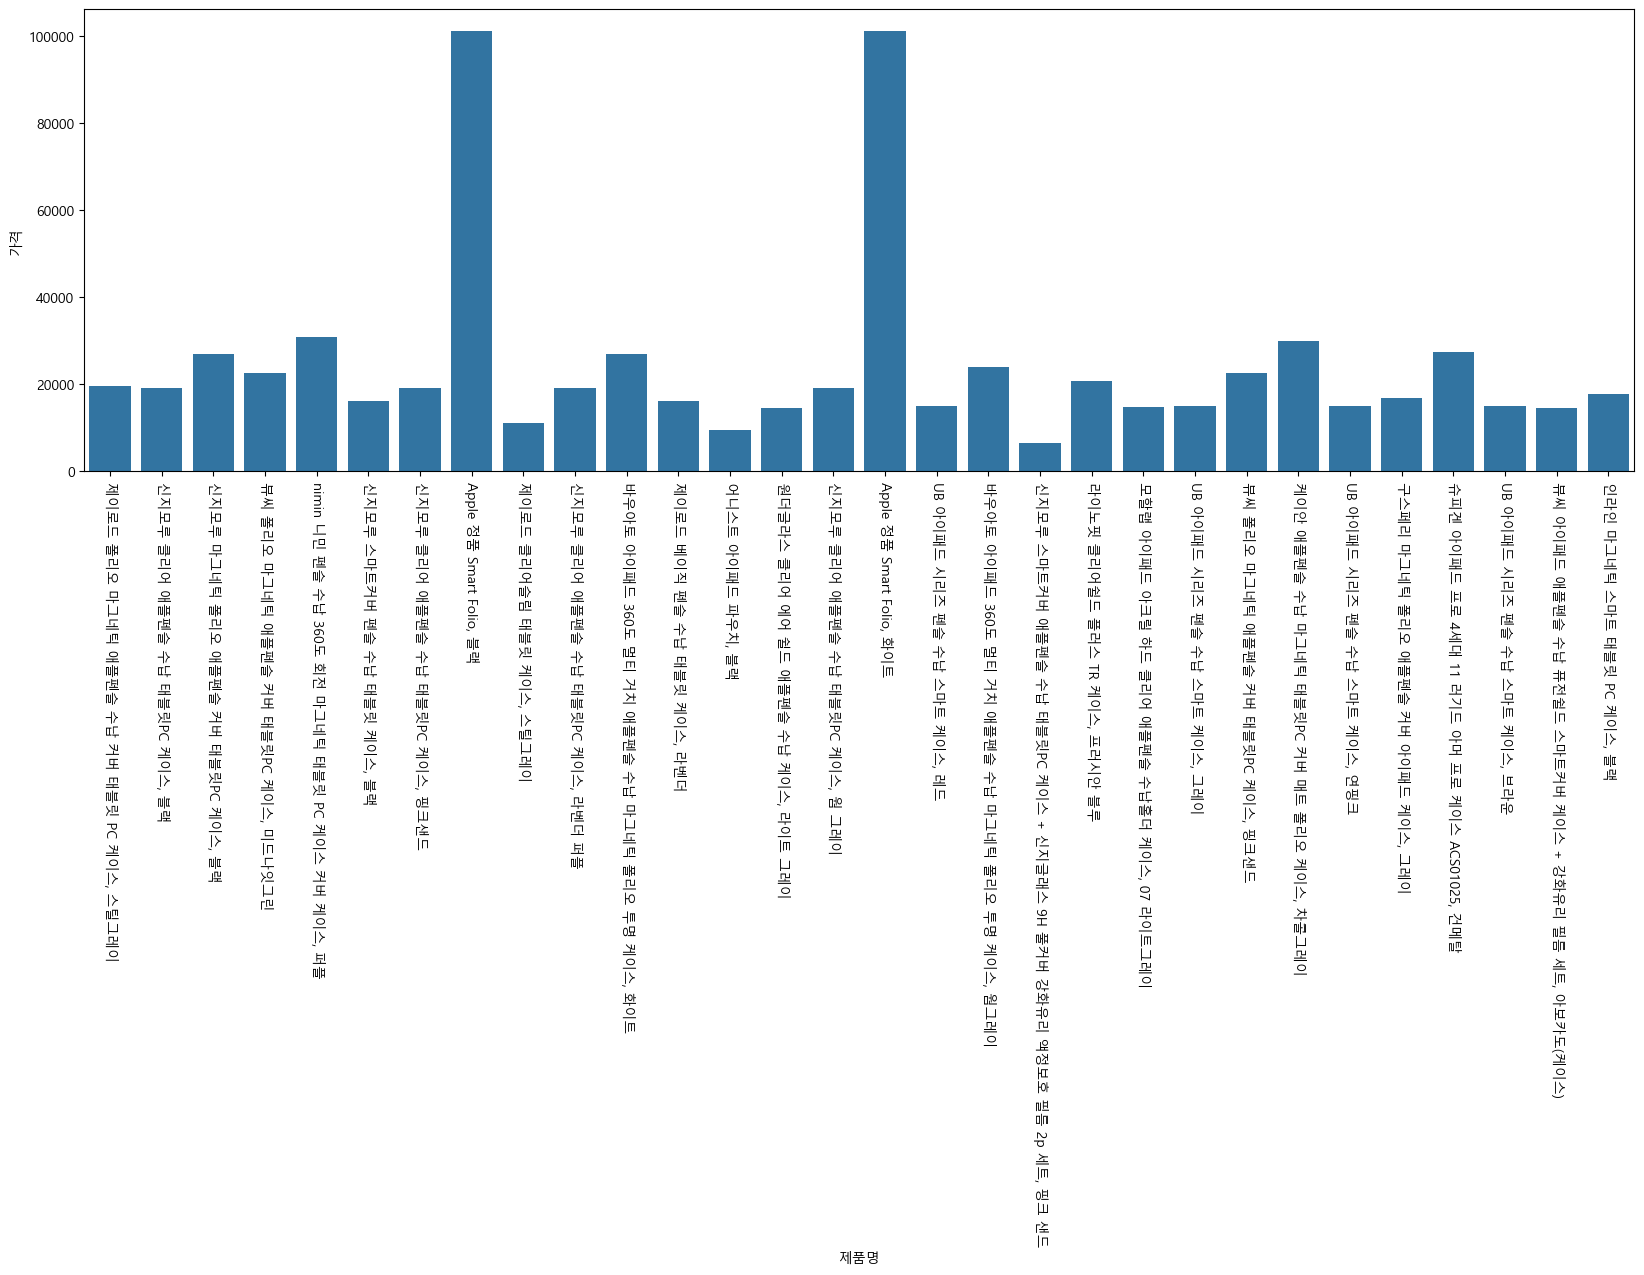

In [158]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (20, 6))
plt.xticks(rotation=270)
sns.barplot(data = num_col, x = '제품명', y = '가격')

<Axes: xlabel='제품명', ylabel='별점'>

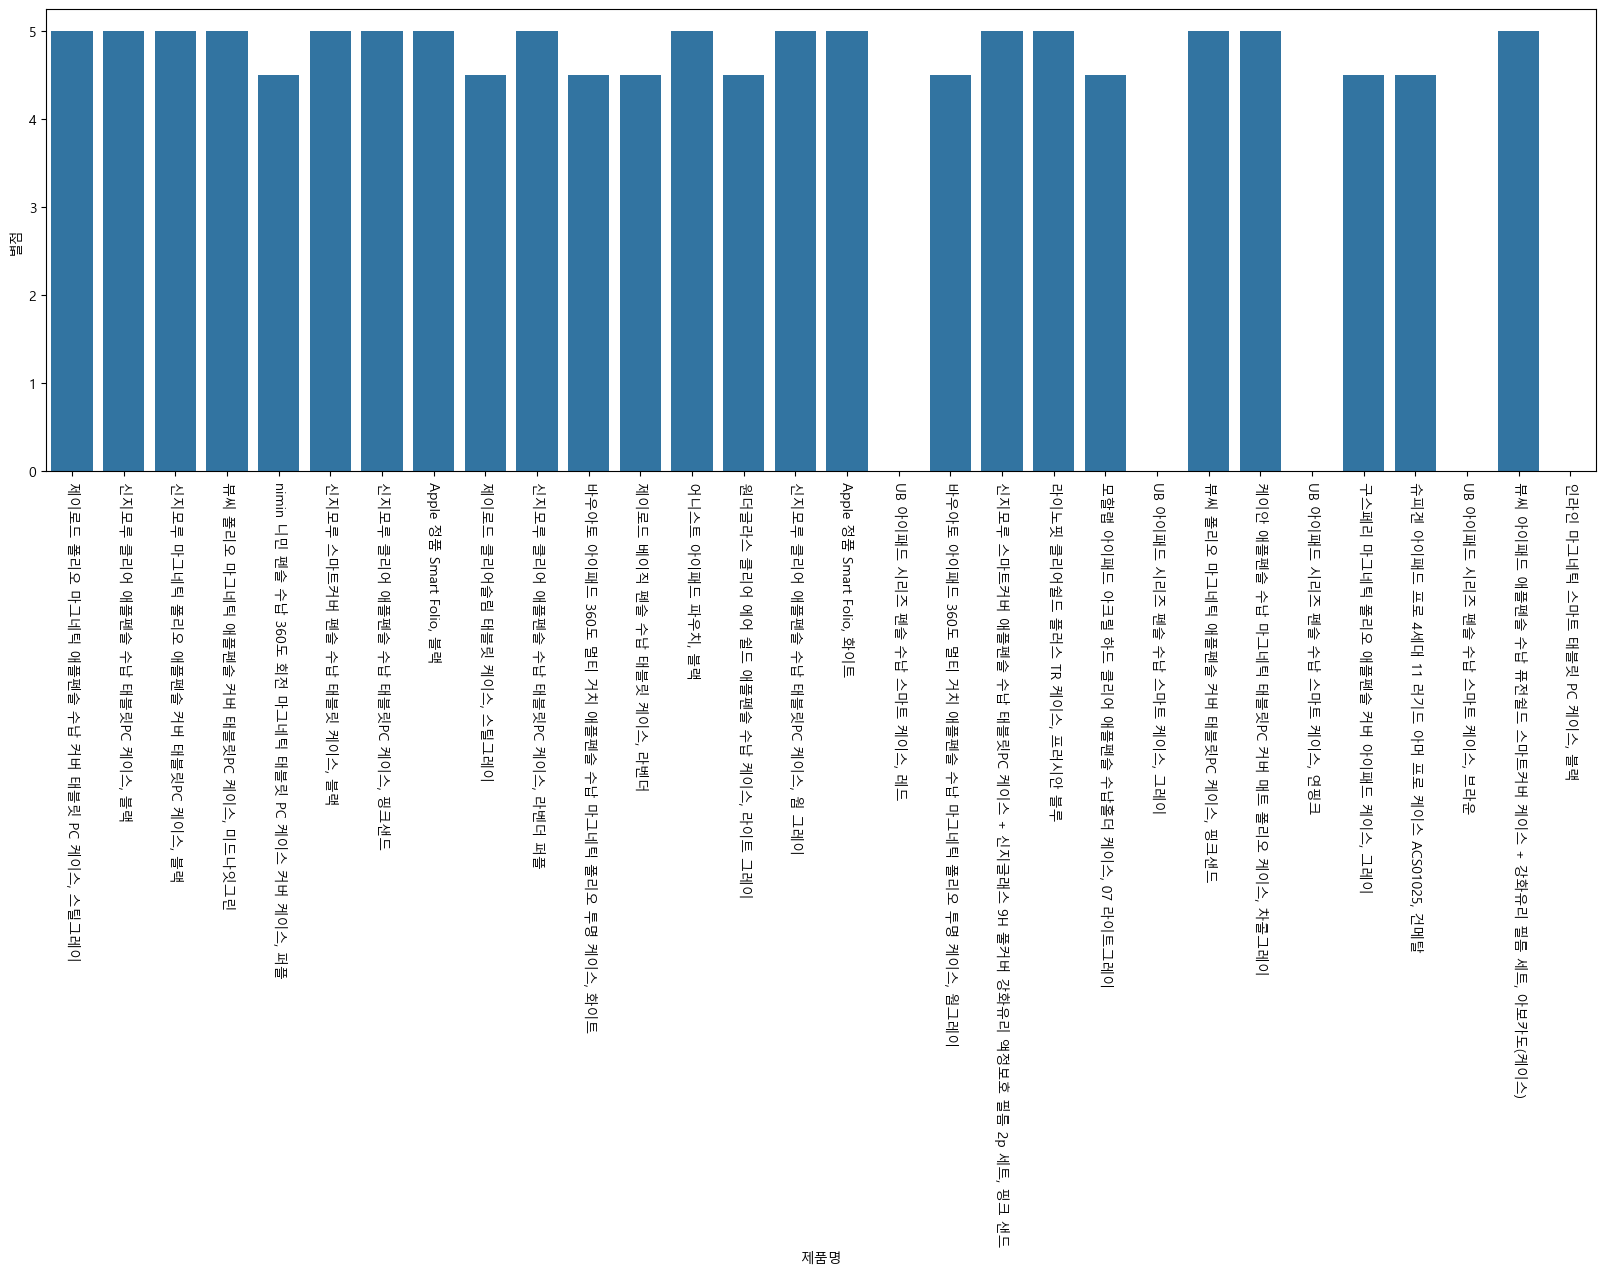

In [160]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (20, 6))
plt.xticks(rotation=270)
sns.barplot(data = num_col, x = '제품명', y = '별점')

<Axes: xlabel='제품명', ylabel='리뷰개수'>

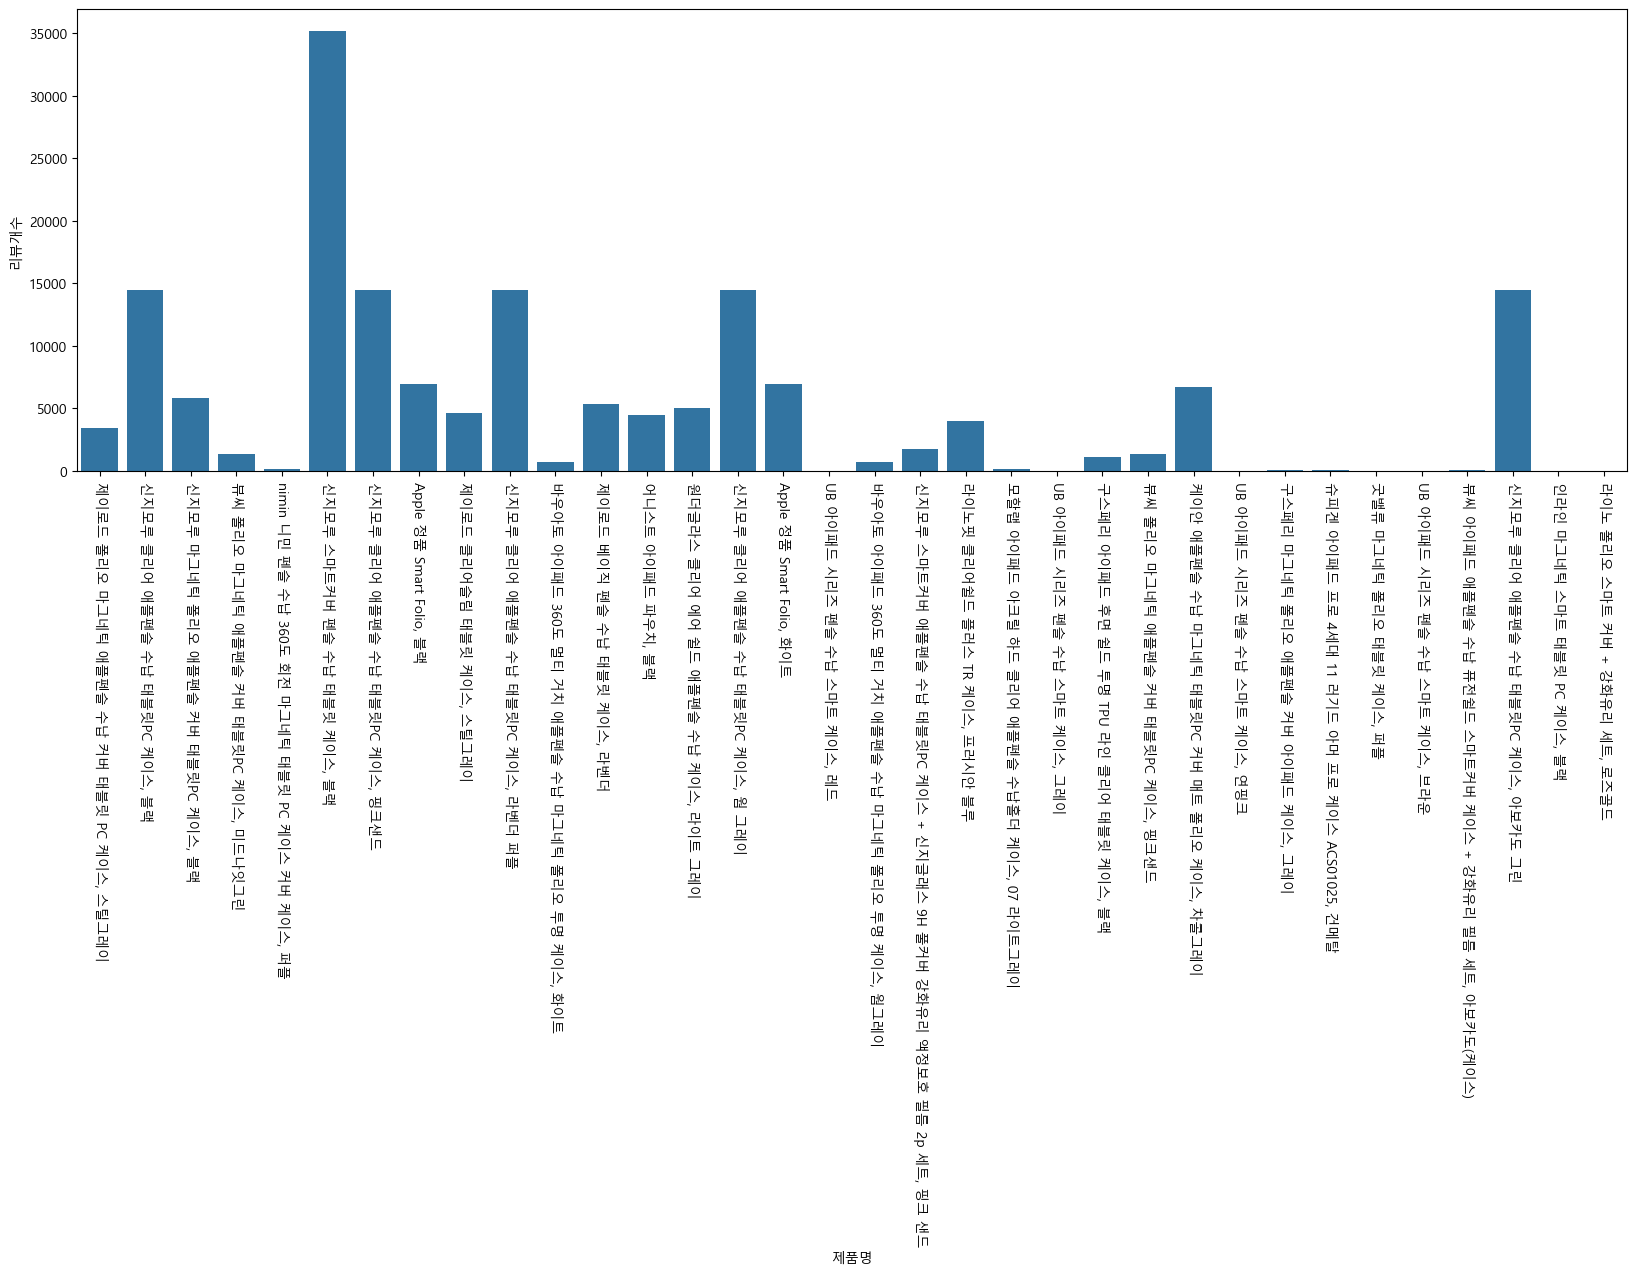

In [127]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (20, 6))
plt.xticks(rotation=270)
sns.barplot(data = num_col, x = '제품명', y = '리뷰개수')

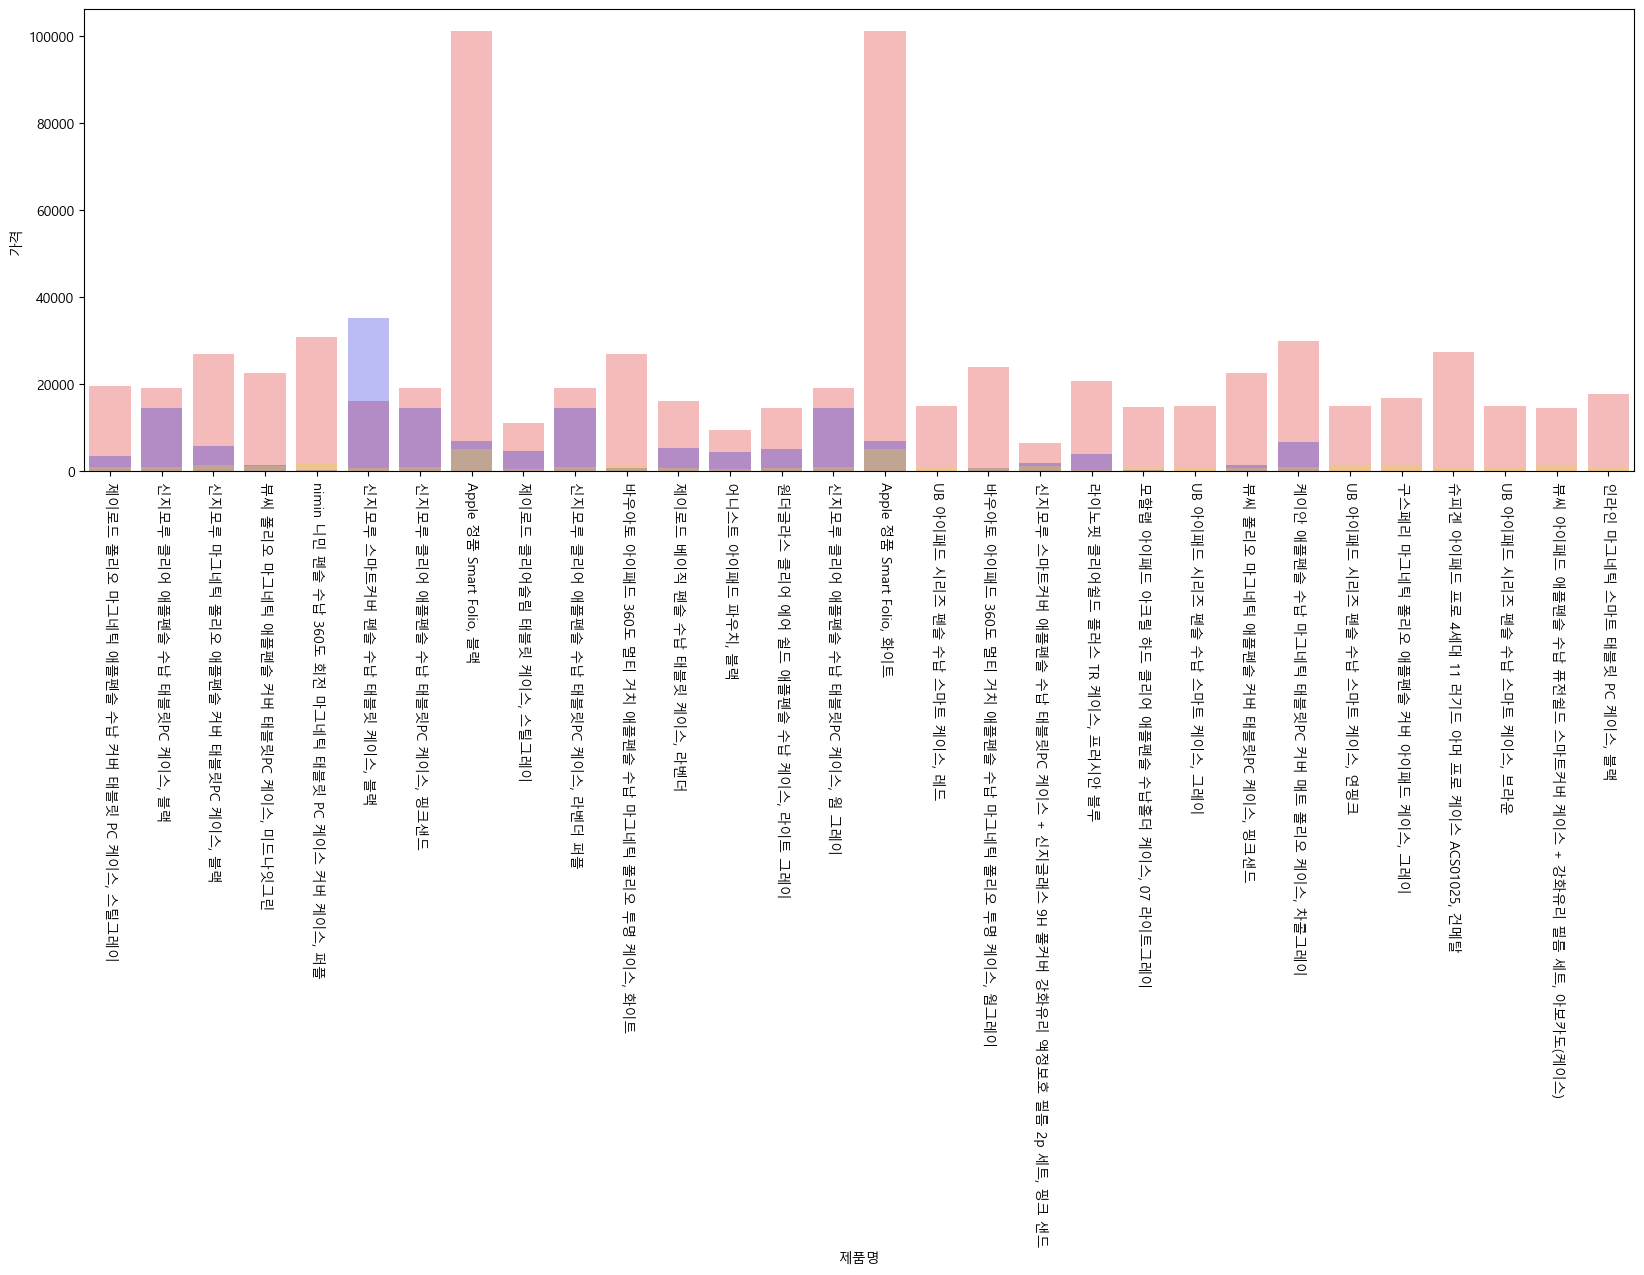

In [164]:
ax = plt.rcParams['font.family'] = 'Malgun Gothic'
ax = plt.figure(figsize = (20, 6))
ax = plt.xticks(rotation=270)
ax = sns.barplot(data = num_col, x = '제품명', y = '가격', color= 'red', alpha=0.3)
ax = sns.barplot(data = num_col, x = '제품명', y = '별점', color= 'green', alpha=0.3)
ax = sns.barplot(data = num_col, x = '제품명', y = '리뷰개수', color= 'blue', alpha=0.3)
ax = sns.barplot(data = num_col, x = '제품명', y = '적립금', color= 'yellow', alpha=0.3)
plt.show()

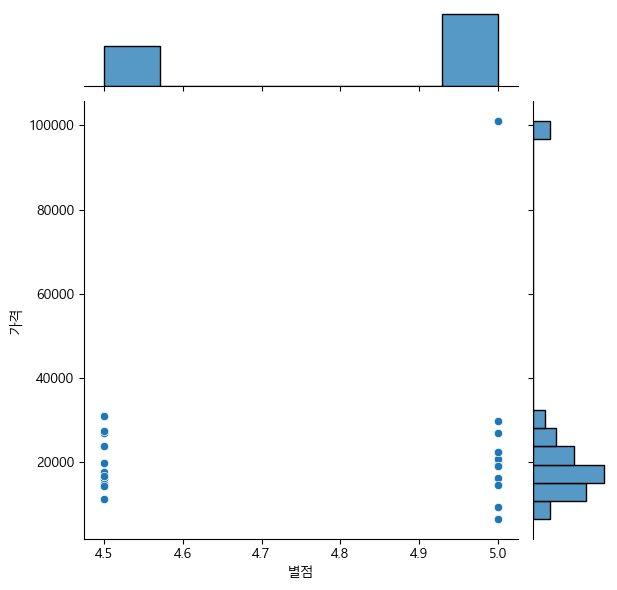

In [167]:
sns.jointplot(x=df['별점'], y=df['가격'], kind = 'scatter')
# 색 구분